# Report mAIstro

Use this notebook for testing report mAIstro.


In [436]:
%%capture --no-stderr
%pip install --quiet -U langgraph langchain_openai langchain_community langchain_core tavily-python langchain_anthropic 

In [321]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

_set_env("OPENAI_API_KEY")
_set_env("ANTHROPIC_API_KEY")

In [525]:
from langchain_openai import ChatOpenAI
gpt_4o = ChatOpenAI(model="gpt-4o", temperature=0) 

from langchain_anthropic import ChatAnthropic 
claude_3_5_sonnet = ChatAnthropic(model="claude-3-5-sonnet-20240620", temperature=0) 

We'll use [Tavily API](https://tavily.com/) web search tool.

In [3]:
_set_env("TAVILY_API_KEY")

In [472]:
from tavily import TavilyClient, AsyncTavilyClient
tavily_client = TavilyClient()
tavily_async_client = AsyncTavilyClient()


We'll use [LangSmith](https://docs.smith.langchain.com/) for [tracing](https://docs.smith.langchain.com/concepts/tracing).

In [473]:
_set_env("LANGCHAIN_API_KEY")
os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_PROJECT"] = "report-mAIstro"

## Natural Language Report Creation

Report mAIstro requires just two inputs from users:
   - A `topic` for the report
   - An optional `structure` in natural language

   While a topic alone can generate basic reports, we found that providing a structure significantly improves quality. For example, business strategy reports might need case studies, while comparative analyses benefit from structured comparison tables. The natural language structure acts as a flexible template, guiding the AI to create more focused and relevant reports.

Here are a few example report types:

### Industry Comparisons

* One style of report is comparisons.
* The goal is to analyze and compare different offerings across key dimensions.

Example topics:
- "Compare these AI Agent Frameworks - LangGraph, CrewAI, OpenAI Swarm, Llama-Index Workflows - on capabilities."
- "Compare enterprise LLM platforms - Azure OpenAI, AWS Bedrock, Anthropic Claude - across features and pricing."
- "Analyze AI observability tools - LangSmith, Braintrust, Datadog - focusing on key differentiators."


In [532]:
# Structure
report_structure = """This report type focuses on comparative analysis.

The report structure should include:
1. Introduction (no research needed)
   - Brief overview of the topic area
   - Context for the comparison

2. Main Body Sections:
   - One dedicated section for EACH offering being compared in the user-provided list
   - Each section should examine:
     - Core Features (bulleted list)
     - Architecture & Implementation (2-3 sentences)
     - One example use case (2-3 sentences)
   
3. No Main Body Sections other than the ones dedicated to each offering in the user-provided list

4. Conclusion with Comparison Table (no research needed)
   - Structured comparison table that:
     * Compares all offerings from the user-provided list across key dimensions
     * Highlights relative strengths and weaknesses
   - Final recommendations"""

# Topic 
report_topic = "Give an overview of capabilities and use case these AI Agent Frameworks: LangGraph, CrewAI, OpenAI Swarm, Llama-Index Workflows."

# Tavily search parameters
tavily_topic = "general"
tavily_days = None # Only applicable for news topic

### Industry Trends

* One style of report is industry trends.
* Here the emphasis is summary of recent trends in the industry.

Example topics:
- "Given an overview of recent business updates for these AI observability offerings - LangSmith, Braintrust, Datadog, Arize Phoenix."

TODO: `news` search results are not great from Tavily API currently.  Test [serpapi](https://serpapi.com/) instead.

In [475]:
# Structure
report_structure = """This report type is focused on recent industry trends and business updates.

The report structure should include:
1. Introduction (no research needed)
   - Brief overview of the topic area
   - Context for the business trends analysis

2. Main Body Sections:
   - One dedicated section for EACH company being tracked in the user-provided list
   - Each section should examine the news and highlight any of the following: 
      * Tracking significant business events (funding, acquisitions, partnerships)
      * Analyzing product launches and feature updates
      * Shifts in market strategy and positioning
      * Identifying emerging patterns across the industry
      * Considering competitive responses and market dynamics

3. No Main Body Sections other than the ones dedicated to each company in the user-provided list

4. Conclusion
- A timeline of key events across companies
- Analysis of emerging industry patterns
- Implications for the broader market"""

# Report topic
report_topic = "Give an overview of recent business updates for these AI observability / evaluation frameworks: LangSmith, Braintrust, Datadog AI Observability, Arize Phoenix."

# Tavily search parameters
tavily_topic = "news"
tavily_days = 30 # Only applicable for news topic

# Use general search for now
tavily_topic = "general"
tavily_days = None # Only applicable for news topic

### Business Strategy  

* One style of report is business strategy.
* Here the emphasis is on providing insightful examples from prior / similar case-studies.
* The goal is to inform current business decisions through analysis of historical patterns.

Example topics:
- "We are considering an AI agent marketplace for Langgraph. What would make this successful?"

In [508]:
# Structure
report_structure = """This report type focuses on strategic insights drawn from analogous case studies.

The report should have exactly 5 sections:
1. A brief introduction (no research needed)
   - Overview of the core business challenge
   - Key considerations and objectives

2. Three focused case studies that:
   - Draw from successful examples in related or analogous markets
   - Can be from different industries but should share similar business model elements
   - Prioritize examples that solved comparable challenges
   - Each case study should:
     * Describe the core business model and value proposition
     * Highlight specific strategies that drove success
     * Identify one surprising or non-obvious insight
     * Extract lessons relevant to the current challenge

3. A conclusion with comparative analysis (no research needed)
   - Structured comparison table that:
     * Maps key success factors across the case studies
     * Identifies common patterns and differentiators
     * Translates insights into actionable recommendations
   - Final strategic recommendations

Keep sections concise and focused on extracting practical insights that can inform strategy."""

# Report topic
report_topic =  "We are considering a developer-focused marketplace for AI agents. What would make this successful?"

# Tavily search parameters
tavily_topic = "general"
tavily_days = None # Only applicable for news topic

### How-To  

* One style of report is how-to guides and implementation case studies.
* Here the emphasis is on providing practical, step-by-step guidance and real-world implementation examples.
* The goal is to explain technical processes and showcase successful deployments.

Example topics:
- "What would be the process of integrating LangGraph Platform for deploying AI Agents into AWS."
- "How Replit uses Langgraph and Langsmith to build AI Agents."
- "Step-by-step guide to implementing RAG with Langgraph and Pinecone."

In [573]:
# Structure
report_structure = """This report type focuses on extracting key technical implementation details.

The report structure should include:

1. Introduction (no research needed)
   - Brief overview of the technologies involved 
   - Brief overview of the problem or need 
   
2. Implementation Stages:
   Each stage should be a distinct section covering:
   - Problem Statement: What needed to be solved
   - Technical Approach: How it was implemented
   - Key Components: Tools, frameworks, or services used
   - Integration Points: How it connects to other parts
   Only include sections that cover unique aspects - do not force a specific number of sections.
   Aim for at most 3 sections to keep the report concise.

3. Conclusion (no research needed):
   - Key technical takeaways
   - Integration benefits
   - Future technical considerations

Each section should emphasize:
- Specific technical details
- Concrete implementation examples
- Measurable improvements"""

# Report topic
report_topic = "How Replit uses Langgraph and Langsmith to build AI Agents."

# Tavily search parameters
tavily_topic = "general"
tavily_days = None # Only applicable for news topic

## Schemas

* Graph state and related schemas for report generation

In [565]:
import operator
from typing_extensions import TypedDict
from typing import  Annotated, List, Optional, Literal
from pydantic import BaseModel, Field

class Section(BaseModel):
    name: str = Field(
        description="Name for this section of the report.",
    )
    description: str = Field(
        description="Brief overview of the main topics and concepts to be covered in this section.",
    )
    research: bool = Field(
        description="Whether to perform web research for this section of the report."
    )
    content: str = Field(
        description="The content of the section."
    )   

class Sections(BaseModel):
    sections: List[Section] = Field(
        description="Sections of the report.",
    )

class SearchQuery(BaseModel):
    search_query: str = Field(None, description="Query for web search.")

class Queries(BaseModel):
    queries: List[SearchQuery] = Field(
        description="List of search queries.",
    )

class ReportState(TypedDict):
    topic: str # Report topic
    tavily_topic: Literal["general", "news"] # Tavily search topic
    tavily_days: Optional[int] # Only applicable for news topic
    report_structure: str # Report structure
    number_of_queries: int # Number web search queries to perform per section    
    sections: list[Section] # List of report sections 
    completed_sections: Annotated[list, operator.add] # Send() API key
    report_sections_from_research: str # String of any completed sections from research to write final sections
    final_report: str # Final report

class ReportStateOutput(TypedDict):
    final_report: str # Final report

class SectionState(TypedDict):
    tavily_topic: Literal["general", "news"] # Tavily search topic
    tavily_days: Optional[int] # Only applicable for news topic
    number_of_queries: int # Number web search queries to perform per section 
    section: Section # Report section   
    search_queries: list[SearchQuery] # List of search queries
    source_str: str # String of formatted source content from web search
    report_sections_from_research: str # String of any completed sections from research to write final sections
    completed_sections: list[Section] # Final key we duplicate in outer state for Send() API

class SectionOutputState(TypedDict):
    completed_sections: list[Section] # Final key we duplicate in outer state for Send() API

## Utility functions

* Functions to get and format [search results](https://docs.tavily.com/docs/python-sdk/tavily-search/api-reference#keyword-arguments-optional) from the Tavily API
* Function to format sections of the report

In [566]:
import asyncio
from langsmith import traceable

def deduplicate_and_format_sources(search_response, max_tokens_per_source, include_raw_content=True):
    """
    Takes either a single search response or list of responses from Tavily API and formats them.
    Limits the raw_content to approximately max_tokens_per_source.
    include_raw_content specifies whether to include the raw_content from Tavily in the formatted string.
    
    Args:
        search_response: Either:
            - A dict with a 'results' key containing a list of search results
            - A list of dicts, each containing search results
            
    Returns:
        str: Formatted string with deduplicated sources
    """
    # Convert input to list of results
    if isinstance(search_response, dict):
        sources_list = search_response['results']
    elif isinstance(search_response, list):
        sources_list = []
        for response in search_response:
            if isinstance(response, dict) and 'results' in response:
                sources_list.extend(response['results'])
            else:
                sources_list.extend(response)
    else:
        raise ValueError("Input must be either a dict with 'results' or a list of search results")
    
    # Deduplicate by URL
    unique_sources = {}
    for source in sources_list:
        if source['url'] not in unique_sources:
            unique_sources[source['url']] = source
    
    # Format output
    formatted_text = "Sources:\n\n"
    for i, source in enumerate(unique_sources.values(), 1):
        formatted_text += f"Source {source['title']}:\n===\n"
        formatted_text += f"URL: {source['url']}\n===\n"
        formatted_text += f"Most relevant content from source: {source['content']}\n===\n"
        if include_raw_content:
            # Using rough estimate of 4 characters per token
            char_limit = max_tokens_per_source * 4
            # Handle None raw_content
            raw_content = source.get('raw_content', '')
            if raw_content is None:
                raw_content = ''
                print(f"Warning: No raw_content found for source {source['url']}")
            if len(raw_content) > char_limit:
                raw_content = raw_content[:char_limit] + "... [truncated]"
            formatted_text += f"Full source content limited to {max_tokens_per_source} tokens: {raw_content}\n\n"
                
    return formatted_text.strip()

def format_sections(sections: list[Section]) -> str:
    """ Format a list of sections into a string """
    formatted_str = ""
    for idx, section in enumerate(sections, 1):
        formatted_str += f"""
{'='*60}
Section {idx}: {section.name}
{'='*60}
Description:
{section.description}
Requires Research: 
{section.research}

Content:
{section.content if section.content else '[Not yet written]'}

"""
    return formatted_str

@traceable
def tavily_search(query):
    """ Search the web using the Tavily API.
    
    Args:
        query (str): The search query to execute
        
    Returns:
        dict: Tavily search response containing:
            - results (list): List of search result dictionaries, each containing:
                - title (str): Title of the search result
                - url (str): URL of the search result
                - content (str): Snippet/summary of the content
                - raw_content (str): Full content of the page if available"""
     
    return tavily_client.search(query, 
                         max_results=5, 
                         include_raw_content=True)

@traceable
async def tavily_search_async(search_queries, tavily_topic, tavily_days):
    """
    Performs concurrent web searches using the Tavily API.

    Args:
        search_queries (List[SearchQuery]): List of search queries to process
        tavily_topic (str): Type of search to perform ('news' or 'general')
        tavily_days (int): Number of days to look back for news articles (only used when tavily_topic='news')

    Returns:
        List[dict]: List of search results from Tavily API, one per query

    Note:
        For news searches, each result will include articles from the last `tavily_days` days.
        For general searches, the time range is unrestricted.
    """
    
    search_tasks = []
    for query in search_queries:
        if tavily_topic == "news":
            search_tasks.append(
                tavily_async_client.search(
                    query,
                    max_results=5,
                    include_raw_content=True,
                    topic="news",
                    days=tavily_days
                )
            )
        else:
            search_tasks.append(
                tavily_async_client.search(
                    query,
                    max_results=5,
                    include_raw_content=True,
                    topic="general"
                )
            )

    # Execute all searches concurrently
    search_docs = await asyncio.gather(*search_tasks)

    return search_docs

## Research plan generation

Here you can test the report planner in isolation.

In particular, you can look at: 

1. The search queries generated for a given report topic and structure
2. The sections generated for a given report topic and structure

In [570]:
from langchain_core.messages import HumanMessage, SystemMessage

# Prompt to generate a search query to help with planning the report outline
report_planner_query_writer_instructions="""You are an expert technical writer, helping to plan a report. 

The report will be focused on the following topic:

{topic}

The report structure will follow these guidelines:

{report_organization}

Your goal is to generate {number_of_queries} search queries that will help gather comprehensive information for planning the report sections. 

The query should:

1. Be related to the topic 
2. Help satisfy the requirements specified in the report organization

Make the query specific enough to find high-quality, relevant sources while covering the breadth needed for the report structure."""

# Prompt generating the report outline
report_planner_instructions="""You are an expert technical writer, helping to plan a report.

Your goal is to generate the outline of the sections of the report. 

The overall topic of the report is:

{topic}

The report should follow this organization: 

{report_organization}

You should reflect on this information to plan the sections of the report: 

{context}

Now, generate the sections of the report. Each section should have the following fields:

- Name - Name for this section of the report.
- Description - Brief overview of the main topics and concepts to be covered in this section.
- Research - Whether to perform web research for this section of the report.
- Content - The content of the section, which you will leave blank for now.

Consider which sections require web research. For example, introduction and conclusion will not require research because they will distill information from other parts of the report."""

async def generate_report_plan(state: ReportState):

    # Inputs
    topic = state["topic"]
    report_structure = state["report_structure"]
    number_of_queries = state["number_of_queries"]
    tavily_topic = state["tavily_topic"]
    tavily_days = state.get("tavily_days", None)

    # Convert JSON object to string if necessary
    if isinstance(report_structure, dict):
        report_structure = str(report_structure)

    # Generate search query
    structured_llm = claude_3_5_sonnet.with_structured_output(Queries)

    # Format system instructions
    system_instructions_query = report_planner_query_writer_instructions.format(topic=topic, report_organization=report_structure, number_of_queries=number_of_queries)

    # Generate queries  
    results = structured_llm.invoke([SystemMessage(content=system_instructions_query)]+[HumanMessage(content="Generate search queries that will help with planning the sections of the report.")])

    # Web search
    query_list = [query.search_query for query in results.queries]
    search_docs = await tavily_search_async(query_list, tavily_topic, tavily_days)

    # Deduplicate and format sources
    source_str = deduplicate_and_format_sources(search_docs, max_tokens_per_source=1000, include_raw_content=True)

    # Format system instructions
    system_instructions_sections = report_planner_instructions.format(topic=topic, report_organization=report_structure, context=source_str)

    # Generate sections 
    structured_llm = claude_3_5_sonnet.with_structured_output(Sections)
    report_sections = structured_llm.invoke([SystemMessage(content=system_instructions_sections)]+[HumanMessage(content="Generate the sections of the report. Your response must include a 'sections' field containing a list of sections. Each section must have: name, description, plan, research, and content fields.")])

    return {"sections": report_sections.sections}

In [574]:
# Generate report plan
sections = await generate_report_plan({"topic": report_topic, "report_structure": report_structure, "number_of_queries": 2, "tavily_topic": tavily_topic, "tavily_days": tavily_days})

In [575]:
# Print sections
for section in sections['sections']:
    print(f"{'='*50}")
    print(f"Name: {section.name}")
    print(f"Description: {section.description}")
    print(f"Research: {section.research}")

Name: Introduction
Description: Brief overview of Replit, LangGraph, and LangSmith technologies, and the need for AI agents in development environments.
Research: False
Name: Implementing AI Agents with LangGraph
Description: Detailed exploration of how Replit uses LangGraph to build and visualize AI agents, including the technical approach, key components, and integration points.
Research: True
Name: Enhancing Agent Performance with LangSmith
Description: In-depth analysis of how Replit integrates LangSmith for monitoring, debugging, and improving AI agent performance, including technical implementation details and measurable improvements.
Research: True
Name: Human-in-the-Loop Workflows and Code Execution
Description: Examination of Replit's implementation of human-in-the-loop workflows and the AI Agent Code Execution API, focusing on technical details and integration benefits.
Research: True
Name: Conclusion
Description: Summary of key technical takeaways, integration benefits, and 

Trace: 

https://smith.langchain.com/public/a9819f55-0e21-4d83-9687-4733e06d255b/r

## Section writing

Now, we can test the section writer in isolation.

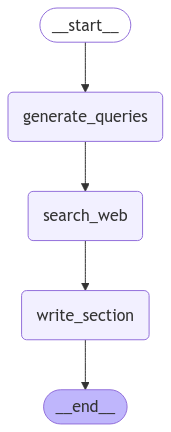

In [560]:
from IPython.display import Image, display
from langgraph.graph import START, END, StateGraph

# Query writer instructions
query_writer_instructions="""Your goal is to generate targeted web search queries that will gather comprehensive information for writing a technical report section.

Topic for this section:
{section_topic}

When generating {number_of_queries} search queries, ensure they:
1. Cover different aspects of the topic (e.g., core features, real-world applications, technical architecture)
2. Include specific technical terms related to the topic
3. Target recent information by including year markers where relevant (e.g., "2024")
4. Look for comparisons or differentiators from similar technologies/approaches
5. Search for both official documentation and practical implementation examples

Your queries should be:
- Specific enough to avoid generic results
- Technical enough to capture detailed implementation information
- Diverse enough to cover all aspects of the section plan
- Focused on authoritative sources (documentation, technical blogs, academic papers)"""

# Section writer instructions
section_writer_instructions = """You are an expert technical writer crafting one section of a technical report.

Topic for this section:
{section_topic}

Guidelines for writing:

1. Technical Accuracy:
- Include specific version numbers
- Reference concrete metrics/benchmarks
- Cite official documentation
- Use technical terminology precisely

2. Length and Style:
- Strict 150-200 word limit
- No marketing language
- Technical focus
- Write in simple, clear language
- Start with your most important insight in **bold**
- Use short paragraphs (2-3 sentences max)

3. Structure:
- Use ## for section title (Markdown format)
- Only use ONE structural element IF it helps clarify your point:
  * Either a focused table comparing 2-3 key items (using Markdown table syntax)
  * Or a short list (3-5 items) using proper Markdown list syntax:
    - Use `*` or `-` for unordered lists
    - Use `1.` for ordered lists
    - Ensure proper indentation and spacing
- End with ### Sources that references the below source material formatted as:
  * List each source with title, date, and URL
  * Format: `- Title : URL`

3. Writing Approach:
- Include at least one specific example or case study
- Use concrete details over general statements
- Make every word count
- No preamble prior to creating the section content
- Focus on your single most important point

4. Use this source material to help write the section:
{context}

5. Quality Checks:
- Exactly 150-200 words (excluding title and sources)
- Careful use of only ONE structural element (table or list) and only if it helps clarify your point
- One specific example / case study
- Starts with bold insight
- No preamble prior to creating the section content
- Sources cited at end"""

def generate_queries(state: SectionState):
    """ Generate search queries for a section """

    # Get state 
    number_of_queries = state["number_of_queries"]
    section = state["section"]

    # Generate queries 
    structured_llm = claude_3_5_sonnet.with_structured_output(Queries)

    # Format system instructions
    system_instructions = query_writer_instructions.format(section_topic=section.description, number_of_queries=number_of_queries)

    # Generate queries  
    queries = structured_llm.invoke([SystemMessage(content=system_instructions)]+[HumanMessage(content="Generate search queries on the provided topic.")])

    return {"search_queries": queries.queries}

async def search_web(state: SectionState):
    """ Search the web for each query, then return a list of raw sources and a formatted string of sources."""
    
    # Get state 
    search_queries = state["search_queries"]
    tavily_topic = state["tavily_topic"]
    tavily_days = state.get("tavily_days", None)

    # Web search
    query_list = [query.search_query for query in search_queries]
    search_docs = await tavily_search_async(query_list, tavily_topic, tavily_days)

    # Deduplicate and format sources
    source_str = deduplicate_and_format_sources(search_docs, max_tokens_per_source=5000, include_raw_content=True)

    return {"source_str": source_str}

def write_section(state: SectionState):
    """ Write a section of the report """

    # Get state 
    section = state["section"]
    source_str = state["source_str"]

    # Format system instructions
    system_instructions = section_writer_instructions.format(section_title=section.name, section_topic=section.description, context=source_str)

    # Generate section  
    section_content = claude_3_5_sonnet.invoke([SystemMessage(content=system_instructions)]+[HumanMessage(content="Generate a report section based on the provided sources.")])
    
    # Write content to the section object  
    section.content = section_content.content

    # Write the updated section to completed sections
    return {"completed_sections": [section]}

# Add nodes and edges 
section_builder = StateGraph(SectionState, output=SectionOutputState)
section_builder.add_node("generate_queries", generate_queries)
section_builder.add_node("search_web", search_web)
section_builder.add_node("write_section", write_section)

section_builder.add_edge(START, "generate_queries")
section_builder.add_edge("generate_queries", "search_web")
section_builder.add_edge("search_web", "write_section")
section_builder.add_edge("write_section", END)

# Compile
section_builder_graph = section_builder.compile()

# View
display(Image(section_builder_graph.get_graph(xray=1).draw_mermaid_png()))


In [514]:
sections = sections['sections'] 
test_section = sections[1]
print(f"{'='*50}")
print(f"Name: {test_section.name}")
print(f"Description: {test_section.description}")
print(f"Research: {test_section.research}")

Name: Case Study 1: GitHub Marketplace - A Developer's Hub
Description: Analysis of GitHub Marketplace as a successful developer-focused platform. Examination of its business model, value proposition, and strategies that drove its success in the developer tools ecosystem.
Research: True


In [515]:
# Test with one section
report_section = await section_builder_graph.ainvoke({"section": test_section, "number_of_queries": 2, "tavily_topic": tavily_topic, "tavily_days": tavily_days})

In [516]:
from IPython.display import Markdown
section = report_section['completed_sections'][0]
Markdown(section.content)

## GitHub Marketplace: Empowering Developers and Driving Platform Success

**GitHub Marketplace has become a key driver of GitHub's success by creating a thriving ecosystem for developers and tools**. Launched in 2017, the marketplace allows developers to share and monetize apps that extend GitHub's functionality. This creates a virtuous cycle where developers build useful tools, which attracts more users to GitHub's platform.

The marketplace offers both free and paid apps across categories like code quality, continuous integration, and project management. GitHub takes a 25% commission on paid app sales, creating a revenue stream beyond its core subscription plans. 

Popular marketplace apps include:

- Travis CI for continuous integration
- ZenHub for project management 
- Sentry for error tracking

By fostering this ecosystem, GitHub increases its value proposition to developers and organizations. The marketplace helps GitHub maintain its position as the leading platform for software development collaboration and version control.

As of 2024, there are over 20,000 actions available in the GitHub Marketplace, highlighting its growth and importance to the developer community. This integration of third-party tools directly into GitHub's workflow cements its place at the center of the modern software development lifecycle.

### Sources
- GitHub Business Model: https://businessmodelanalyst.com/github-business-model/
- GitHub Marketplace - GitHub Docs: https://docs.github.com/en/apps/github-marketplace
- 2024 predictions for open source software - LinkedIn: https://www.linkedin.com/pulse/2024-predictions-open-source-software-github-rtxdc

Trace: 

https://smith.langchain.com/public/1005bc67-a1e1-475e-86ca-d70e75f5c975/r

## End-to-end report generation

Now, we'll combine the report planner, parallelized section writer, and final section writer to generate the entire report.


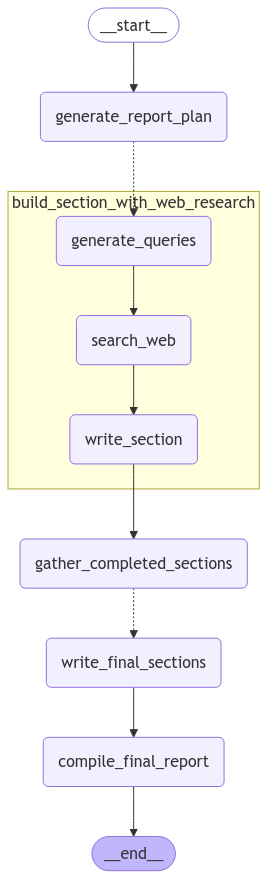

In [576]:
from langgraph.constants import Send

final_section_writer_instructions="""You are an expert technical writer crafting a section that synthesizes information from the rest of the report.

Section to write: 
{section_topic}

Available report content:
{context}

1. Section-Specific Approach:

For Introduction:
- Use # for report title (Markdown format)
- 50-100 word limit
- Write in simple and clear language
- Focus on the core motivation for the report in 1-2 paragraphs
- Use a clear narrative arc to introduce the report
- Include NO structural elements (no lists or tables)
- No sources section needed

For Conclusion/Summary:
- Use ## for section title (Markdown format)
- 100-150 word limit
- For comparative reports:
    * Must include a focused comparison table using Markdown table syntax
    * Table should distill insights from the report
    * Keep table entries clear and concise
- For non-comparative reports: 
    * Only use ONE structural element IF it helps distill the points made in the report:
    * Either a focused table comparing items present in the report (using Markdown table syntax)
    * Or a short list using proper Markdown list syntax:
      - Use `*` or `-` for unordered lists
      - Use `1.` for ordered lists
      - Ensure proper indentation and spacing
- End with specific next steps or implications
- No sources section needed

3. Writing Approach:
- Use concrete details over general statements
- Make every word count
- Focus on your single most important point

4. Quality Checks:
- For introduction: 50-100 word limit, # for report title, no structural elements, no sources section
- For conclusion: 100-150 word limit, ## for section title, only ONE structural element at most, no sources section
- Markdown format
- Do not include word count or any preamble in your response"""

def initiate_section_writing(state: ReportState):
    """ This is the "map" step when we kick off web research for some sections of the report """    
    
    # Kick off section writing in parallel via Send() API for any sections that require research
    return [
        Send("build_section_with_web_research", {"section": s, 
                                                 "number_of_queries": state["number_of_queries"], 
                                                 "tavily_topic": state["tavily_topic"], 
                                                 "tavily_days": state.get("tavily_days", None)}) 
        for s in state["sections"] 
        if s.research
    ]

def write_final_sections(state: SectionState):
    """ Write final sections of the report, which do not require web search and use the completed sections as context """

    # Get state 
    section = state["section"]
    completed_report_sections = state["report_sections_from_research"]
    
    # Format system instructions
    system_instructions = final_section_writer_instructions.format(section_title=section.name, section_topic=section.description, context=completed_report_sections)

    # Generate section  
    section_content = claude_3_5_sonnet.invoke([SystemMessage(content=system_instructions)]+[HumanMessage(content="Generate a report section based on the provided sources.")])
    
    # Write content to section 
    section.content = section_content.content

    # Write the updated section to completed sections
    return {"completed_sections": [section]}

def gather_completed_sections(state: ReportState):
    """ Gather completed sections from research """    

    # List of completed sections
    completed_sections = state["completed_sections"]

    # Format completed section to str to use as context for final sections
    completed_report_sections = format_sections(completed_sections)

    return {"report_sections_from_research": completed_report_sections}

def initiate_final_section_writing(state: ReportState):
    """ This is the "map" step when we kick off research on any sections that require it using the Send API """    

    # Kick off section writing in parallel via Send() API for any sections that do not require research
    return [
        Send("write_final_sections", {"section": s, "report_sections_from_research": state["report_sections_from_research"]}) 
        for s in state["sections"] 
        if not s.research
    ]

def compile_final_report(state: ReportState):
    """ Compile the final report """    

    # Get sections
    sections = state["sections"]
    completed_sections = {s.name: s.content for s in state["completed_sections"]}

    # Update sections with completed content while maintaining original order
    for section in sections:
        section.content = completed_sections[section.name]

    # Compile final report
    all_sections = "\n\n".join([s.content for s in sections])

    return {"final_report": all_sections}

# Add nodes and edges 
builder = StateGraph(ReportState, output=ReportStateOutput)
builder.add_node("generate_report_plan", generate_report_plan)
builder.add_node("build_section_with_web_research", section_builder.compile())
builder.add_node("gather_completed_sections", gather_completed_sections)
builder.add_node("write_final_sections", write_final_sections)
builder.add_node("compile_final_report", compile_final_report)
builder.add_edge(START, "generate_report_plan")
builder.add_conditional_edges("generate_report_plan", initiate_section_writing, ["build_section_with_web_research"])
builder.add_edge("build_section_with_web_research", "gather_completed_sections")
builder.add_conditional_edges("gather_completed_sections", initiate_final_section_writing, ["write_final_sections"])
builder.add_edge("write_final_sections", "compile_final_report")
builder.add_edge("compile_final_report", END)

graph = builder.compile()
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [577]:
report = await graph.ainvoke({"topic": report_topic, 
                                   "report_structure": report_structure, 
                                   "number_of_queries": 2, 
                                   "tavily_topic": tavily_topic, 
                                   "tavily_days": tavily_days})

In [578]:
from IPython.display import Markdown
Markdown(report['final_report'])

# AI Agent Monitoring and Optimization in Development Environments

Replit, a leading online development platform, has integrated cutting-edge technologies like LangGraph and LangSmith to enhance its AI-powered coding assistant. This integration addresses the growing need for robust monitoring and optimization of AI agents in complex development environments. LangGraph enables Replit to create sophisticated, stateful AI workflows, while LangSmith provides crucial observability and debugging capabilities. Together, these tools have significantly improved Replit's ability to build, monitor, and refine AI agents that can assist developers in tasks ranging from environment setup to code deployment. This technological synergy has led to a dramatic increase in AI-driven projects on the Replit platform, showcasing the potential of AI-augmented software development.

## Replit's LangSmith Integration Enhances AI Agent Monitoring

**Replit's integration of LangSmith has significantly improved the observability and performance of their AI agents.** The collaboration between Replit and LangChain teams led to three key advancements in LangSmith's capabilities:

1. Improved performance and scalability for large traces
2. Enhanced search and filter functionalities within traces
3. Thread view for human-in-the-loop workflows

Replit Agent, built on LangGraph, involves complex workflows beyond simple code review and writing. LangSmith's tracing functionality captures the entire execution flow of these LLM applications, providing comprehensive context for debugging. To handle Replit's extensive traces with hundreds of steps, LangChain enhanced its data processing and frontend rendering.

The new search pattern allows users to filter specific events within a trace, significantly reducing debugging time. Additionally, LangSmith's thread view collates related traces from multiple user sessions, offering a cohesive view of agent-user interactions across multi-turn conversations.

This integration has accelerated Replit's development and scaling of complex agents, setting new standards for AI-driven development. By leveraging LangSmith's robust observability features, Replit can now more effectively identify bottlenecks and areas for human intervention in their AI agent workflows.

### Sources:
- Pushing LangSmith to new limits with Replit Agent's complex workflows ... : https://blog.langchain.dev/customers-replit/
- Replit Enhances AI Agent Monitoring with LangSmith Integration : https://cryptofocushub.com/replit-enhances-ai-agent-monitoring-with-langsmith-integration/

## Analysis of Replit's LangGraph Implementation

**Replit leveraged LangGraph to create highly customizable and observable AI agent workflows with persistent state management.** Their implementation used LangGraph's graph-based approach to define complex agent interactions and state transitions. This allowed Replit to build agents capable of planning, creating dev environments, installing dependencies, and deploying applications autonomously. 

A key feature was LangGraph's integration with LangSmith for deep visibility into agent interactions. This enabled Replit to debug tricky issues in their long-running, multi-step agent traces. To handle Replit's large traces with hundreds of steps, LangSmith improved its ingestion and frontend rendering capabilities.

Replit also worked with LangChain to add new LangSmith functionality:
- Search within traces to quickly find specific events
- Thread view to collate related traces for multi-turn conversations
- Improved performance for loading and displaying long traces

These enhancements allowed Replit to pinpoint issues, optimize agent performance, and enable human-in-the-loop workflows. The ability to search within traces and visualize multi-turn conversations was particularly valuable for debugging complex agent behaviors reported by alpha testers.

### Sources
- Pushing LangSmith to new limits with Replit Agent's complex workflows ...: https://blog.langchain.dev/customers-replit/
- Building Production-Ready AI Agents with LangGraph: A Real ... - GitHub: https://github.com/langchain-ai/langgraph/discussions/2104

## Replit Agent: Enhancing AI-Assisted Development

**Replit Agent represents a significant leap forward in AI-powered software development, enabling rapid application creation and deployment from natural language prompts.** This innovative tool acts as an AI pair programmer, configuring development environments, installing dependencies, and executing code. Users can describe their desired application in plain English, and the Agent translates this into functional code.

A key example of the Agent's capabilities is a user who created an interactive campus parking map with real-time availability reports, solving a common student pain point. The Agent handled the entire process from idea to deployment, demonstrating its ability to tackle real-world problems efficiently.

Replit has implemented several technical improvements to enhance the Agent's reliability and performance:

- Enhanced stability to prevent unexpected code deletions
- Fixed image upload issues for seamless handling of all image sizes
- Optimized memory usage for improved backend performance
- Introduced a Git Commit Viewer for easier version control

These enhancements have contributed to a 34x year-over-year growth in AI projects on the Replit platform, with nearly 300,000 distinct AI-related projects created by Q2 2023.

### Sources
- Introducing Replit Agent: https://blog.replit.com/introducing-replit-agent
- November 15, 2024 - Replit Docs: https://docs.replit.com/updates/2024/11/15/changelog
- Replit — State of AI Development: 34x growth in AI projects, OpenAI's ...: https://blog.replit.com/ai-on-replit

## Summary of Key Technical Takeaways

Replit's integration of LangSmith and LangGraph has revolutionized AI agent development within their platform. LangSmith's enhanced tracing capabilities now handle complex workflows with hundreds of steps, while new search and filter functionalities dramatically reduce debugging time. LangGraph enabled the creation of sophisticated AI agents capable of autonomous planning, environment setup, and deployment. These advancements led to a 34x year-over-year growth in AI projects on Replit.

Key improvements include:
- Optimized trace handling and rendering
- Thread view for multi-turn conversations
- Persistent state management in agent workflows
- Enhanced stability and memory optimization

Future considerations should focus on further refining human-in-the-loop processes and expanding the Agent's capabilities to tackle increasingly complex development tasks. The success of Replit's AI-driven approach sets a new standard for integrating AI assistants in software development environments.

In [581]:
from pathlib import Path
# Save Markdown content to a file
Path("../report_examples/reports/").mkdir(exist_ok=True)
markdown_file = "../report_examples/reports/replit_langgraph_langsmith.md"
with open(markdown_file, 'w') as f:
    f.write(report['final_report'])

### LangGraph Marketplace Report

https://smith.langchain.com/public/c6c4be25-b07d-4e4d-a816-7636235592cb/r

### Agent Frameworks Report

https://smith.langchain.com/public/cb66f284-6cc9-4b94-8249-66133ffafd1a/r

### Observability News Report

https://smith.langchain.com/public/eaf1db08-b3ca-476a-9a82-8463cdd5590d/r

### Replit Report

https://smith.langchain.com/public/e09633f5-7213-4c16-8537-821cfc981106/r